# Cyclistic Bike Sharing Analysis

### Objective
- collecting all the Cyclist files in python
- Cleaning & editing data in order to be usable in SQL for data analysis
- Converting column to it's appropriate datatype

In [2]:
# doing all the necessary imports
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Gathering, Cleaning, and Fixing Data

In [3]:
# using glob to retrieve the all pathname for files in a list
csv_files = glob.glob(r'/Users/omarbenavente/Downloads/cyclist/*csv')


In [4]:
csv_files

['/Users/omarbenavente/Downloads/cyclist/202208-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202303-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202206-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202210-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202305-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202212-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202211-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202304-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202302-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202207-divvy-tripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202209-divvy-publictripdata.csv',
 '/Users/omarbenavente/Downloads/cyclist/202301-divvy-tripdata.csv']

In [5]:
# combining all the csv file in the glob list
df = pd.concat([pd.read_csv(f,index_col=False) for f in csv_files ])

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual


In [7]:
df.info()
# seems like started and ended at isn't datetime  we need to change it to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829030 entries, 0 to 190300
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 622.6+ MB


In [8]:
df.duplicated().sum()
# seems like this file doesn't have any duplicates

0

In [9]:
df.shape
# seems like we have a huge file 

(5829030, 13)

<Axes: >

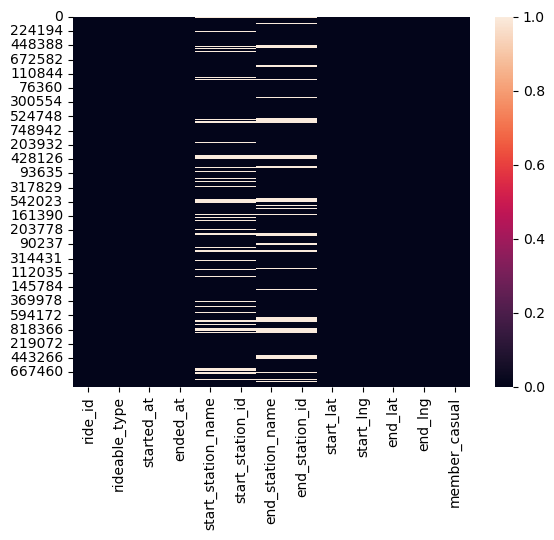

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    834545
start_station_id      834677
end_station_name      891757
end_station_id        891898
start_lat                  0
start_lng                  0
end_lat                 5961
end_lng                 5961
member_casual              0
dtype: int64

In [12]:
# % of null values in the data
100*df.isnull().sum()/len(df)

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.317048
start_station_id      14.319312
end_station_name      15.298549
end_station_id        15.300968
start_lat              0.000000
start_lng              0.000000
end_lat                0.102264
end_lng                0.102264
member_casual          0.000000
dtype: float64

In [13]:
# dropping the nulls
df = df.dropna()

In [14]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [15]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [16]:
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [17]:
df['ended_at'] - df['started_at']

142      0 days 00:09:04
271      0 days 00:00:45
329      0 days 01:01:38
357      0 days 00:14:18
422      0 days 01:32:38
               ...      
190296   0 days 00:11:08
190297   0 days 00:25:16
190298   0 days 00:15:11
190299   0 days 00:15:20
190300   0 days 00:11:00
Length: 4494681, dtype: timedelta64[ns]

In [18]:
df[df['started_at'] > df['ended_at']]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
265788,BD0B84E552536029,electric_bike,2022-08-01 13:21:10,2022-08-01 13:21:05,Clark St & Armitage Ave,13146,Clark St & Armitage Ave,13146,41.918310,-87.636293,41.918306,-87.636282,member
288153,3D99C9D3AB75E23F,electric_bike,2022-08-22 13:05:10,2022-08-22 13:04:48,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,41.892139,-87.611958,41.892278,-87.612043,casual
595943,179F7874064251C8,classic_bike,2022-08-05 16:35:21,2022-08-05 16:35:20,Clark St & Montrose Ave,KA1503000022,Clark St & Montrose Ave,KA1503000022,41.961588,-87.666036,41.961588,-87.666036,casual
677294,C0C8DB0E2EA5B9E4,electric_bike,2022-08-25 00:40:51,2022-08-25 00:39:34,Lincoln Ave & Roscoe St*,chargingstx5,Lincoln Ave & Roscoe St*,chargingstx5,41.943302,-87.670862,41.943350,-87.670668,member
677528,953BF4B707AEE983,electric_bike,2022-08-27 12:44:27,2022-08-27 12:43:39,Lincoln Ave & Roscoe St*,chargingstx5,Lincoln Ave & Roscoe St*,chargingstx5,41.943289,-87.670938,41.943350,-87.670668,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131600,5387FB2D8D6AC0F3,electric_bike,2022-09-30 17:27:30,2022-09-30 17:27:26,Halsted St & Polk St,TA1307000121,Halsted St & Polk St,TA1307000121,41.871709,-87.646788,41.871840,-87.646640,member
215969,871B757480E7208F,classic_bike,2022-09-14 17:47:44,2022-09-14 17:47:34,Lincoln Ave & Roscoe St*,chargingstx5,Lincoln Ave & Roscoe St*,chargingstx5,41.943350,-87.670668,41.943350,-87.670668,member
215983,4890C455C466940F,electric_bike,2022-09-08 18:00:55,2022-09-08 18:00:32,Lincoln Ave & Roscoe St*,chargingstx5,Lincoln Ave & Roscoe St*,chargingstx5,41.943246,-87.670936,41.943350,-87.670668,member
230627,BB630AE8E6017B58,electric_bike,2022-09-05 17:56:42,2022-09-05 17:56:41,Millennium Park,13008,Millennium Park,13008,41.881182,-87.623962,41.881032,-87.624084,casual


In [19]:
df['ride_id'].value_counts(ascending=False)
# seems like there are not unique values on bike id. 

241C440C74CB31BB    1
293DEA2769D8CCF9    1
BB12DC1ABB14F851    1
E0878D7639FD1A18    1
17F10BBA3523CECB    1
                   ..
A62D0851CC3906AC    1
D284D1886CFF4129    1
D63BF2904D0460F2    1
EB699855EAB5284D    1
069971675AC7DC62    1
Name: ride_id, Length: 4494681, dtype: int64

In [20]:
# checking if theres any start time is older than the end time
df[df['started_at'] > df['ended_at']].shape

(75, 13)

In [21]:
# taking out rows that the column "started_at" comes after "ended_at"
df = df[df['started_at'] < df['ended_at']]

## Adding Columns
- we want to add the day, month, year, and day of the week when people start biking

In [22]:
df['hour'] = df['started_at'].dt.hour

In [23]:
df['day'] = df['started_at'].dt.day

In [24]:
df['day of week'] = df['started_at'].dt.day_of_week

In [25]:
df['month'] = df['started_at'].dt.month

In [26]:
df['year'] = df['started_at'].dt.year

In [27]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day,day of week,month,year
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.791568,-87.607852,41.803038,-87.606615,casual,16,5,4,8,2022
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,23,11,3,8,2022
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,14,21,6,8,2022
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673,-87.672075,41.895634,-87.672069,casual,16,21,6,8,2022
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,2,21,6,8,2022


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4494342 entries, 142 to 190300
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  hour                int64         
 14  day                 int64         
 15  day of week         int64         
 16  month               int64         
 17  year                int64         
dtypes: datetime64[ns](2), float64(4), int64(5), object(7)
memory usage: 651.5+ MB


In [29]:
# we want to make the column "day of week" to a string so that we can change the number to the actually day
# 0 - Monday, 1 - Tuesday, 2 - Wednesday, 3 - Thursday, 4 - Friday, 5 - Saturday, 6 - Sunday
df['day of week'].unique()

array([4, 3, 6, 5, 1, 2, 0])

In [30]:
df['day of week'] = df['day of week'].astype(str)

In [31]:
dow = {'0':'Monday','1':'Tuesday','2':'Wednesday','3':'Thursday','4':'Friday','5':'Saturday','6':'Sunday'}

In [32]:
df['day of week'] = df['day of week'].map(dow)

In [33]:
month = {'1':'January','2':'February','3':'March','4':'April','5':'May','6':'June','7':'July',
         '8':'August','9':'September','10':'October','11':'November','12':'December'}
df['month'] = df['month'].astype(str).map(month)

In [34]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,hour,day,day of week,month,year
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.791568,-87.607852,41.803038,-87.606615,casual,16,5,Friday,August,2022
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,23,11,Thursday,August,2022
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,14,21,Sunday,August,2022
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673,-87.672075,41.895634,-87.672069,casual,16,21,Sunday,August,2022
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,2,21,Sunday,August,2022


In [35]:
# Since our data is now clean, we can export the file to csv, so that we can import the csv to SQL.

df.to_csv('Cyclist Data.csv',index=False)